In [64]:
import numpy as np
from scipy import linalg, fft, pi
from sympy import Matrix
from math import cos, sin
import matplotlib.pyplot as plt

# 2.c

In [51]:
a = np.array([3, 1, 4, 5])
a_hat = fft.fft(a)
print("The entries of a_hat are: ", a_hat)
I = np.identity(4)
b = np.zeros(4)
A = Matrix([[3,5,4,1],[1,3,5,4],[4,1,3,5],[5,4,1,3]])
print("The eigenvectors are: ", A.eigenvects())

The entries of a_hat are:  [13.-0.j -1.+4.j  1.-0.j -1.-4.j]
The eigenvectors are:  [(1, 1, [Matrix([
[-1],
[ 1],
[-1],
[ 1]])]), (13, 1, [Matrix([
[1],
[1],
[1],
[1]])]), (-1 - 4*I, 1, [Matrix([
[-I],
[-1],
[ I],
[ 1]])]), (-1 + 4*I, 1, [Matrix([
[ I],
[-1],
[-I],
[ 1]])])]


That is, if we choose the eigenvector corresponding to the eigenvalue $13$ to be the free vector, then we have the set of eigen vectors above.

# 3.b

Approximated u vs. up with L = 3


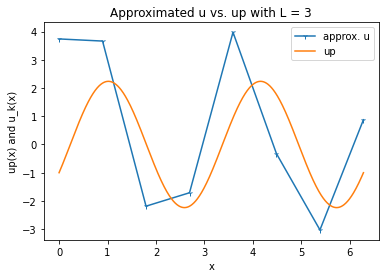

Approximated u vs. up with L = 5


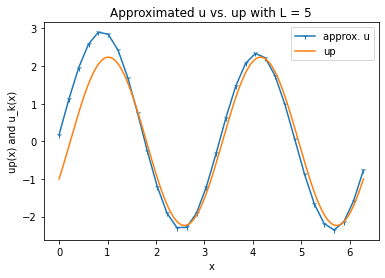

Approximated u vs. up with L = 8


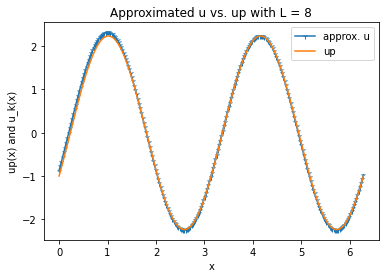

Approximated u vs. up with L = 10


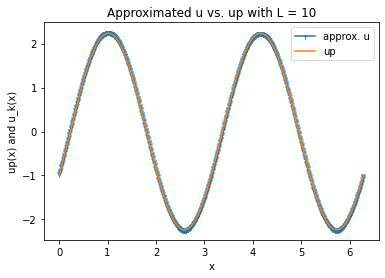

In [100]:
def f(t):
    return 10 * cos(2*t)

def up(t):
    return 2 * sin(2*t) - cos(2*t)

def calculate_u_k(h, omega, alpha, beta, f_k, k):
    """
    u_k = h^{2}(\omega^{k}+\alpha+\beta*\bar{\omega}^{k})^{-1}\hat{f}_{k}
    """
    return h**2 * (omega**k + alpha + beta * omega.conjugate()**k)**(-1) * f_k

# some contants
a = 2
b = 2

for L in (3,5,8,10):
    # define constants for current L
    n = 2**L
    h = 2 * pi / n
    alpha = b * h**2 + a * h - 2
    beta = 1 - a * h
    omega = np.exp(2*pi*1j/n)
    omega_conj = omega.conjugate()
    x = np.linspace(0, 2*pi, num=n, endpoint=True)
    x_sol = np.linspace(0, 2*pi, num=2**10, endpoint=True)
    # fit f_j for j = 0, 1,..., n-1
    f_fitted = [f(t) for t in x]
    
    # fit u_p for j = 0, 1,..., n-1 (for comparison)
    u_fitted = [up(t) for t in x_sol]
    
    # find f_hat
    f_hat = fft.fft(f_fitted)
    u_k = [calculate_u_k(h, omega, alpha, beta, f_k, k) for k,f_k in enumerate(f_hat)]
    u_approx = fft.ifft(u_k).real # remove complex component
    plot_title = "Approximated u vs. up with L = {}".format(L)
    print(plot_title)
    plt.plot(x, u_approx, '-1', x_sol, u_fitted, '-')
    plt.title(plot_title)
    plt.xlabel("x")
    plt.legend(['approx. u', 'up'])
    plt.show()
    plt.close()